**Απόστολος Μουστάκης**

**AM: 03400182**

<font color='darkred'>Οι απαντήσεις σε όλα τα ερωτήματα γράφονται με αυτό το χρώμα ώστε να ξεχωρίζουν από τις εκφωνήσεις </font>

<h1><b>Self-Organizing Maps (SOM)</b></h1>

Στην άσκηση αυτή θα μελετήσετε μία εφαρμογή των <i>Self-Organizing Maps</i> \(<i>SOM</i>) για τη συμπίεση εικόνων. Ως είσοδο θα χρησιμοποιήσετε τη φωτογραφία του διάσημου τενίστα <i>Rafael Nadal</i> (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal.jpg">nadal.jpg</a>). Η άσκηση αυτή βασίστηκε στον κώδικα που παρέχεται <a href=https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb>εδώ</a>.

<h3><b>Κώδικας</b></h3>

In [ ]:
!pip install minisom
!pip install numpy
!pip install matplotlib

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.02280996396446446


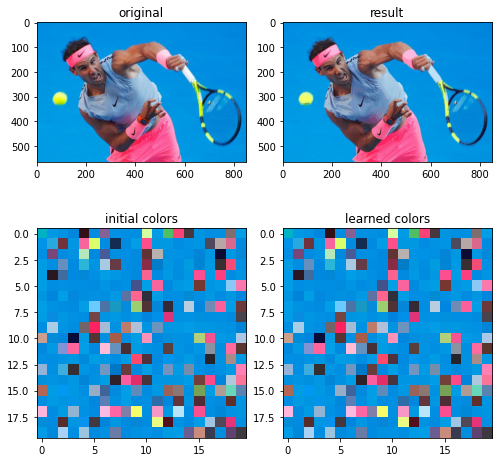

In [4]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

def SOM_function(img, pixels, grid_size, verbose, print_figure, print_colors):

  # SOM initialization and training
  if verbose: print('Training SOM...')
  som = MiniSom(grid_size, grid_size, 3, learning_rate=0.05, neighborhood_function='bubble')
  som.random_weights_init(pixels)
  starting_weights = som.get_weights().copy()  # saving the starting weights
  som.train(pixels, 10000, random_order=True, verbose=verbose)

  quant_error = som.quantization_error(pixels)
  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  if print_figure:
    # show the result
    plt.figure(figsize=(7, 7))
    plt.figure(1)
    plt.subplot(221)
    plt.title('original')
    plt.imshow(img)
    plt.subplot(222)
    plt.title('result')
    plt.imshow(clustered)

  if print_colors:
    plt.subplot(223)
    plt.title('initial colors')
    plt.imshow(starting_weights, interpolation='none')
    plt.subplot(224)
    plt.title('learned colors')
    plt.imshow(som.get_weights(), interpolation='none')
    plt.tight_layout()
    plt.show()

  return quant_error, som

quant, model = SOM_function(img, pixels, 20, True, True, True)

<h3><b>Ερωτήσεις</b><h3>

<li>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i>.</li>

<font color='darkred'>Τα SOM (Self-Organizing Maps) αποτελούν ένα είδος νευρωνικού δικτύου που χρησιμοποιούνται κυρίως για την οπτικοποίηση δεδομένων μέσω μείωσης των διαστάσεων και για συσταδοποίηση.</font>

<font color='darkred'>Η λειτουργία των SOM περιγράφεται περιληπτικά ως εξής:

*   Δημιουργείται ένα πλέγμα (grid) από διασυνδεδεμένους νευρώνες όπου ο καθένας έχει ένα διάνυσμα βάρους. Το πλέγμα αυτό το ορίζει ο χρήστης και μπορεί να έχει οποιοδήποτε μέγεθος (για παράδειγμα 2x2).
*  Κατά την εκπαίδευση στο SOM εισάγονται δεδομένα, τα οποία συνήθως είναι στην μορφή υψηλών διαστάσεων διανυσμάτων. Στην συνέχεια υπολογίζεται η απόσταση (με βάση κάποιο μέτρο απόστασης) μεταξύ καθενός από τα διανύσματα αυτά με τα διανύσματα βάρους των διασυνδεδεμένων νευρώνων. Ο νευρώνας του οποίου το διάνυσμα βάρους έχει την πιο κοντινή απόσταση με το διάνυσμα που έχουμε ως είσοδο θεωρείται ο νικητής.
*   Στην συνέχεια γίνεται ανανέωση των βαρών μόνο στην γειτονιά των νευρώνων εκείνου του νευρώνα που ανακηρύχθηκε νικητής. Με αυτόν τον τρόπο δημιουργούνται συστάδες νευρώνων, καθώς διανύσματα εισόδου που είναι παρόμοια «χαρτογραφούνται» σε νευρώνες που ανήκουν στην ίδια γειτονιά.</font>



<li>Να αναφέρετε ενδεικτικές εφαρμογές των <i>SOM</i>.</li>

<font color='darkred'> Περιληπτικά ενδεικτικές εφαρμογές των SOM αποτελούν: 
*   Επιλογή κυρίαρχων χαρακτηριστικών σε
πολυδιάστατα δείγματα
*   Συμπίεση εικόνων με εντοπισμό παρομοίων
υποπεριοχών (η άσκηση του notebook)
*   Αναγνώριση προτύπων, ταξινόμηση παραδειγμάτων
*   Φιλτάρισμα από παρεμβολές - θορύβους
*   Συμπλήρωση ατελών παραδειγμάτων </font>







<li>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</li>

<font color='darkred'>Στην άσκηση αυτή εκπαιδεύεται ένα SOM με χρήση μίας εικόνας, το οποίο πραγματοποιεί κβάντιση των χρωμάτων της εικόνας με σκοπό να δημιουργήσει ένα μικρό σύνολο χρωμάτων. Το νέο σύνολο αυτό δημιουργείται ανάλογα το μέγεθος του πλέγματος, το οποίο στην ουσία δείχνει το σύνολο των αποχρώσεων που μαθαίνονται από το SOM. Στην συνέχεια το SOM χρησιμοποιεί το σύνολο αυτό ώστε να αναπαραστήσει ξανά την εικόνα, χρησιμοποιώντας αυτή την φορά τις νέες αποχρώσεις που έχει μάθει. Για την αναπαράσταση πραγματοποιεί συσταδοποίηση περιοχών με παρόμοιες αποχρώσεις, οι οποίες ανάλογα το μέγεθος του πλέγματος μπορεί να διαφέρουν είτε λίγο είτε πολύ από την αρχική εικόνα. Με αυτόν τον τρόπο πρακτικά συμπιέζεται και το μέγεθος της εικόνας. 

<li>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 2x2 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</li>

Number of iteration: 1
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1644782046993123


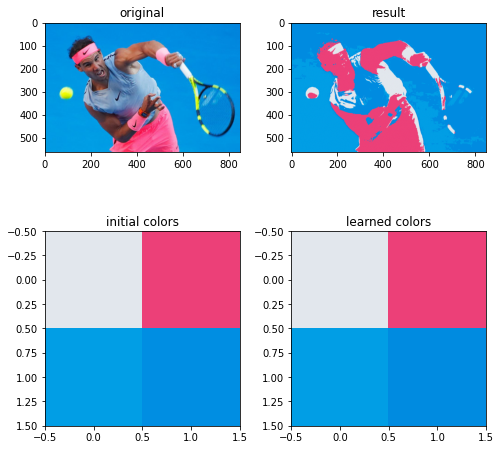

Number of iteration: 2
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.19919818418592805


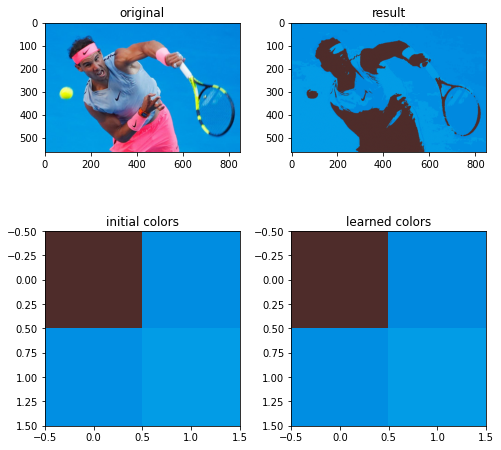

Number of iteration: 3
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.21637877068577155


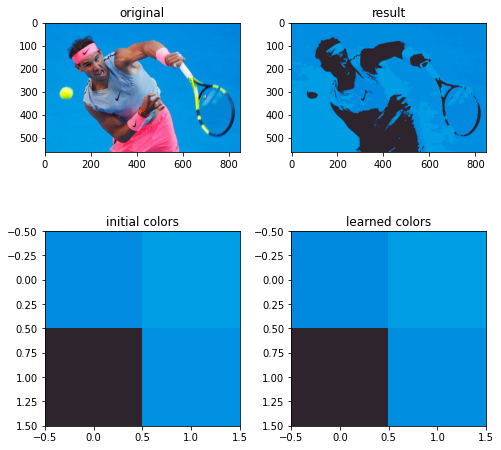

Number of iteration: 4
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2085251294759577


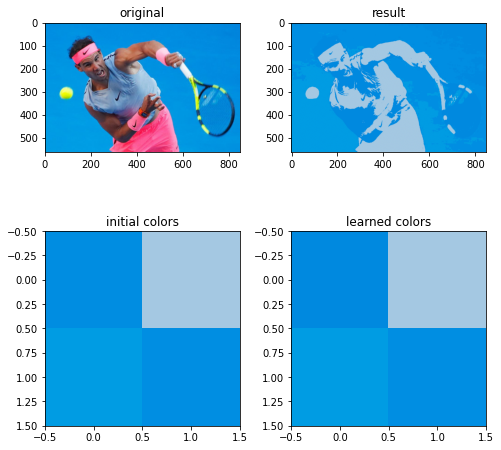

Number of iteration: 5
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15796715301179298


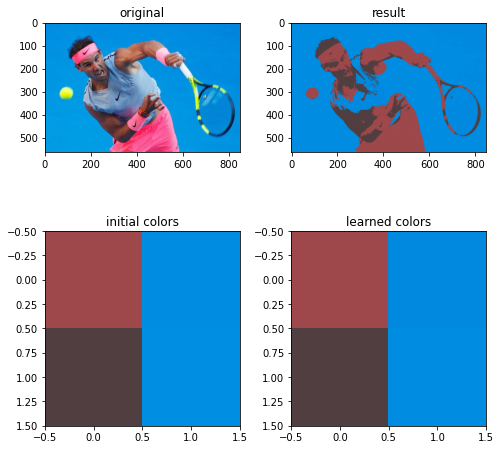

Number of iteration: 6
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.20390655159196097


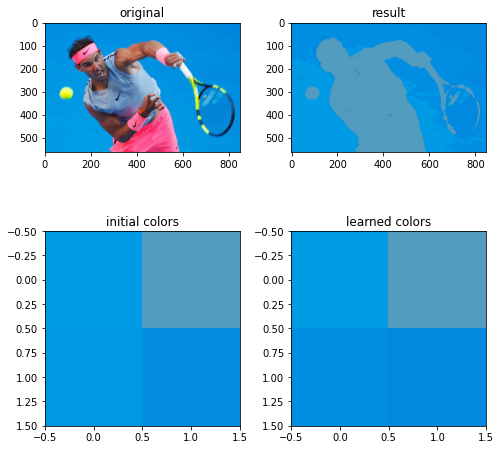

Number of iteration: 7
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14304076292760157


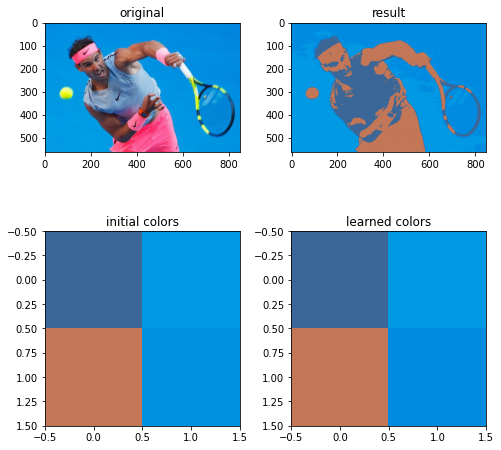

Number of iteration: 8
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1775354045073857


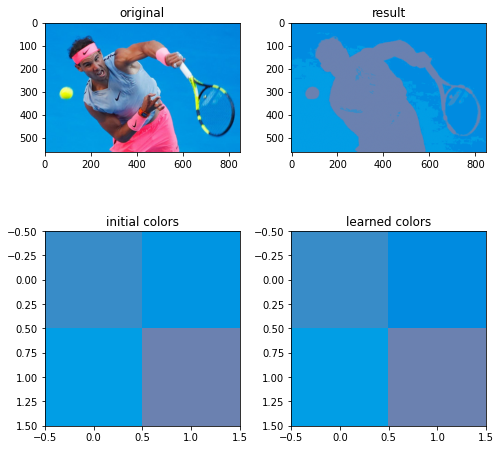

Number of iteration: 9
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.24092047986796308


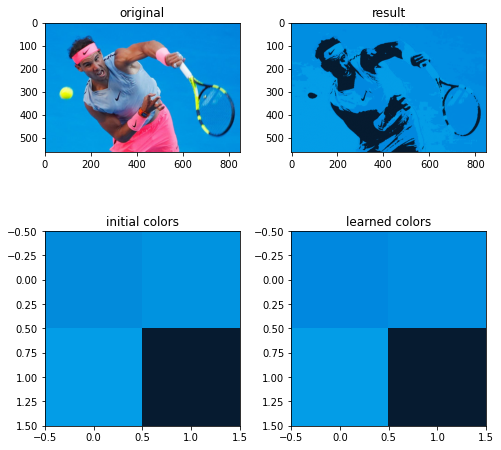

Number of iteration: 10
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 

/usr/local/lib/python3.9/dist-packages/minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.16466765395518587


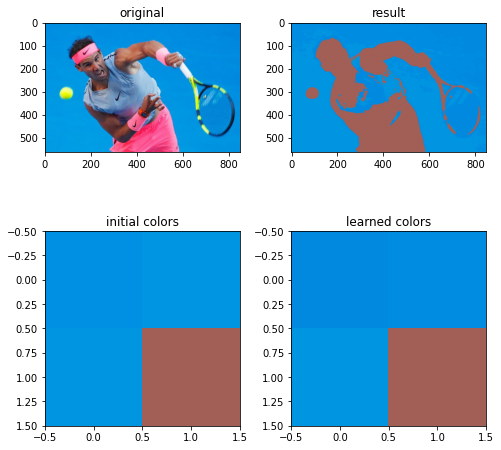

In [ ]:
for i in range(10): #τρέχω τον κώδικα 10 φορές με πλέγμα 2x2
  print('Number of Iteration:', i+1)
  quant, model = SOM_function(img, pixels, 2, True, True, True)

<font color='darkred'>Όπως παρατηρούμε το σφάλμα κβάντισης ποικίλει σε κάθε επανάληψη και είναι πολύ πιο υψηλό σε σχέση με πριν. Σε ένα πλέγμα το οποίο είναι διαστάσεων 2x2 το SOM μπορεί να μάθει μόνο 4 χρώματα. Συνεπώς αν το SOM εκπαιδευτεί να παράγει μόνο αποχρώσεις του μπλε τότε το σφάλμα κβάντισης θα είναι πολύ υψηλό (Επανάληψη 9 – Σφάλμα κβάντισης = 0.241), ενώ αν εκπαιδευτεί για παράδειγμα να παράγει αποχρώσεις και του μπλε και του ροζ το σφάλμα κβάντισης θα είναι χαμηλότερο (Επανάληψη 1 – Σφάλμα κβάντισης  = 0.164). Για αυτό τον λόγο το σφάλμα κβάντισης έχει μεγάλη διακύμανση. Σε κάθε περίπτωση όμως με ένα πλέγμα 2x2 το σφάλμα κβάντισης είναι υψηλό και η εικόνα που προκύπτει δεν είναι μια καθόλου καλή αναπαράσταση της αρχικής.

<li>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος <i>SOM</i> 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</li>

In [ ]:
quant_list = []
for i in range(2,16):
  quant, model = SOM_function(img, pixels, i, False, False, False)
  quant_list.append(quant)

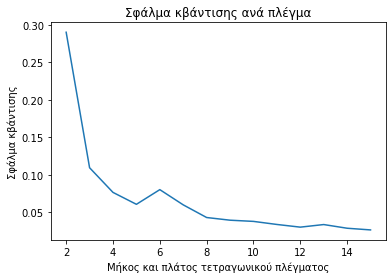

In [ ]:
plt.plot(range(2, 16), quant_list)
plt.title('Σφάλμα κβάντισης ανά πλέγμα')
plt.xlabel('Μήκος και πλάτος τετραγωνικού πλέγματος')
plt.ylabel('Σφάλμα κβάντισης')
plt.show()

<font color='darkred'>Είναι λογικό καθώς αυξάνεται το μέγεθος του πλέγματος να μειώνεται το σφάλμα κβάντισης, καθώς το SOM χρησιμοποιώντας μεγαλύτερο μέγεθος πλέγματος κάθε φορά μπορεί να μάθει περισσότερες αποχρώσεις χρωμάτων. Για μικρά πλέγματα υπάρχει κάποια διακύμανση στο σφάλμα κβάντισης (για παράδειγμα αυξάνεται το σφάλμα κβάντισης στο πλέγμα 6x6) για τον λόγο που περιεγράφηκε στο προηγούμενο ερώτημα. Από εκεί και πέρα το σφάλμα κβάντισης μειώνεται και γενικά είναι πολύ χαμηλό με πολύ μικρές διακυμάνσεις. 

<li>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης.
</li>

<font color='darkred'>Με βάση το προηγούμενο διάγραμμα που μας δείχνει το σφάλμα κβάντισης ανά πλέγμα θα μπορούσαμε να επιλέξουμε μέγεθος πλέγματος είτε 8x8 είτε 12x12 καθώς έχουν μικρά σφάλματα κβάντισης. Παρακάτω εφαρμόζω τα δύο πλέγματα ώστε να τσεκάρω αν είναι αποδεκτό και το μέγεθος συμπίεσης της εικόνας του Nadal.

Grid size 8x8...
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.05275011977579381


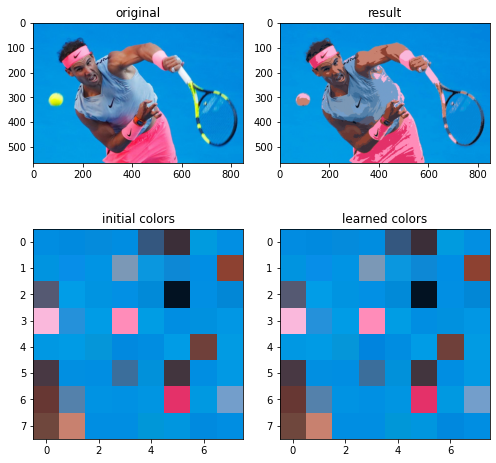

Grid size 12x12...
Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.031939654411122606


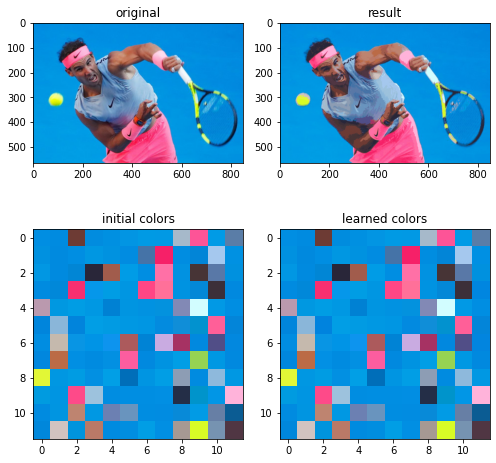

In [ ]:
print('Grid size 8x8...')
quant, model = SOM_function(img, pixels, 8, True, True, True)
print('Grid size 12x12...')
quant, model = SOM_function(img, pixels, 12, True, True, True)

<font color='darkred'> Για μεγαλύτερη ασφάλεια θα επέλεγα μέγεθος πλέγματος 12x12 καθώς έχει μικρό σφάλμα κβάντισης και αρκετές αποχρώσεις. Θα μπορούσα να επιλέξω μέγεθος πλέγματος 8x8 αλλά τρέχοντας τον παραπάνω κώδικα πολλές φορές ορισμένες φορές προκύπτει εικόνα με είτε περισσότερες μπλε αποχρώσεις είτε ροζ.

<li>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</li>

<font color='darkred'>Θα εφαρμόσουμε SOM grid μεγέθους 12x12, όπως αναλύθηκε στο προηγούμενο ερώτημα, για την εικόνα nadal2.jpg. Είναι πολύ σημαντικό η εικόνα αυτή να έχει παρόμοιο μέγεθος με την αρχική και επίσης να μην ξαναεκπαιδεύσουμε το SOM στην νέα εικόνα.

In [5]:
def SOM_function_2(som, img, pixels):

  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  # show the result
  plt.figure(figsize=(7, 7))
  plt.figure(1)
  plt.subplot(221)
  plt.title('original')
  plt.imshow(img)
  plt.subplot(222)
  plt.title('result')
  plt.imshow(clustered)

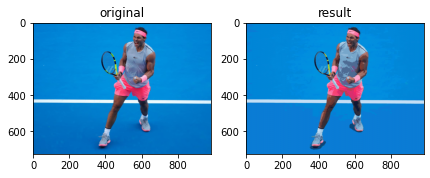

In [ ]:
quant, model = SOM_function(img, pixels, 12, False, False, False)

img2 = plt.imread('nadal2.jpg')
pixels2 = np.reshape(img2, (img2.shape[0]*img2.shape[1], 3)) / 255.

SOM_function_2(model, img2, pixels2)

<font color='darkred'>Παρατηρούμε πως παρόλο που δεν εκπαιδεύσαμε το SOM στην νέα εικόνα τα πήγε πολύ καλά. Αυτό συνέβη γιατί η νέα εικόνα είναι από τον ίδιο αγώνα και περιέχει τα ίδια χρώματα με προηγουμένως. Το SOM δηλαδή έχει εκπαιδευτεί σε αυτές τις αποχρώσεις. Παρακάτω θα δούμε τι θα συμβεί αν βάλουμε μία φωτογραφία του ίδιου τενίστα αλλά με διαφορετικά χρώματα.

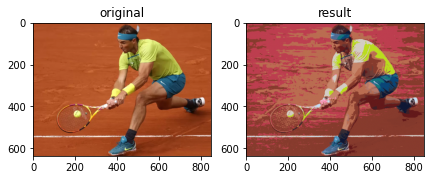

In [ ]:
img3 = plt.imread('nadal3.jpg')
pixels3 = np.reshape(img3, (img3.shape[0]*img3.shape[1], 3)) / 255.

SOM_function_2(model, img3, pixels3)

<font color='darkred'> Όπως ήταν αναμενόμενο τα αποτελέσματα δεν είναι τόσο καλά στην περίπτωση που χρησιμοποιήσουμε μία εικόνα του Nadal να παίζει σε χωμάτινο γήπεδο. Είναι αξιοσημείωτο πως στην εικόνα που προκύπτει φαίνονται ροζ αποχρώσεις που δεν υπάρχουν καθόλου στην αρχική, καθώς το SOM έχει εκπαιδευτεί σε αυτές.

<font color='darkred'> Τέλος, αν χρησιμοποιήσουμε μία εικόνα ενός διαφορετικού τενίστα, όπως για παράδειγμα μία εικόνα της Σάκκαρη και του Τσιτσιπά και φροντίσουμε να έχει παρόμοια χρωματική παλέτα βλέπουμε παρακάτω πως το SOM τα πηγαίνει σχετικά καλά, κάτι που επιβεβαιώνει τα παραπάνω συμπεράσματα.

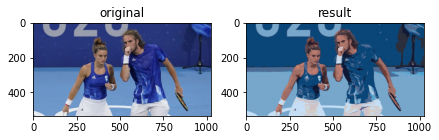

In [ ]:
img4 = plt.imread('sakkari-tsitsipas.jpg')
pixels4 = np.reshape(img4, (img4.shape[0]*img4.shape[1], 3)) / 255.

SOM_function_2(model, img4, pixels4)

<font color='darkred'> 